In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def gen_random_points(n=20, xmin = 0, xmax = 10, ymin = 0, ymax = 10, seed = 42):
    pts = np.random.rand(n, 2)

    xrange = xmax - xmin
    pts[:, 0] *= xrange
    pts[:, 0] += xmin

    yrange = ymax - ymin
    pts[:, 1] *= yrange
    pts[:, 1] += ymin
    return pts

In [4]:
pts = gen_random_points()
pts

array([[3.63145538, 6.14396645],
       [1.54081097, 2.21890023],
       [8.13717778, 1.94744545],
       [5.54338911, 6.32131742],
       [7.20161978, 5.4080713 ],
       [5.59807279, 3.8597463 ],
       [5.24874965, 1.43109057],
       [8.70177716, 4.19177058],
       [3.0553011 , 2.69394153],
       [6.80315069, 9.12155038],
       [4.14083241, 7.94429816],
       [5.82300812, 2.91393072],
       [1.39263017, 8.81094174],
       [8.36619122, 5.16001947],
       [4.39904019, 0.25277762],
       [8.18734001, 7.06646822],
       [7.58547023, 4.21388378],
       [8.49366855, 8.29564607],
       [8.08336707, 1.46975048],
       [7.7062103 , 9.21204808]])

In [7]:
int("123.123")

ValueError: invalid literal for int() with base 10: '123.123'

In [15]:
np.array(pts.tolist())

array([[3.63145538, 6.14396645],
       [1.54081097, 2.21890023],
       [8.13717778, 1.94744545],
       [5.54338911, 6.32131742],
       [7.20161978, 5.4080713 ],
       [5.59807279, 3.8597463 ],
       [5.24874965, 1.43109057],
       [8.70177716, 4.19177058],
       [3.0553011 , 2.69394153],
       [6.80315069, 9.12155038],
       [4.14083241, 7.94429816],
       [5.82300812, 2.91393072],
       [1.39263017, 8.81094174],
       [8.36619122, 5.16001947],
       [4.39904019, 0.25277762],
       [8.18734001, 7.06646822],
       [7.58547023, 4.21388378],
       [8.49366855, 8.29564607],
       [8.08336707, 1.46975048],
       [7.7062103 , 9.21204808]])

In [ ]:
test = [0]

(-0.19518590189010804, 9.660011599585788)

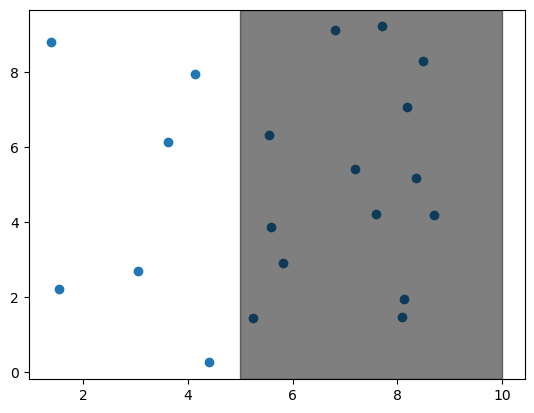

In [14]:
ax = plt.gca()
ax.scatter(pts[:, 0], pts[:, 1])
ymin, ymax = plt.ylim()
ax.fill_betweenx(y=[ymin, ymax], x1=5, x2=10, alpha=0.5, color ="black")
plt.ylim(ymin, ymax)

In [5]:
def plot_highlight(pts, idxs):
    plt.scatter(pts[:, 0], pts[:, 1])
    plt.scatter(pts[idxs, 0], pts[idxs, 1], color="red")

In [6]:
def min_dist_bf(pts):
    min_i = 0
    min_j = 0
    min_dist = float("inf")
    for i in range(len(pts)-1):
        for j in range(i+1, len(pts)):
            dist = np.sqrt(np.sum((pts[i] - pts[j]) ** 2))
            if dist < min_dist:
                min_dist = dist
                min_i = i
                min_j = j
    return min_i, min_j, min_dist

In [7]:
min_dist_bf(pts)

(6, 12, 0.4508429031263324)

In [8]:
sorted_x = np.argsort(pts[:, 0])
sorted_x

array([13,  8,  4,  7,  0,  2, 10,  5, 19,  6, 12, 14, 18, 15, 17, 16,  1,
       11,  9,  3])

In [9]:
sorted_y = np.argsort(pts[:, 1])
sorted_y

array([14,  9, 13, 19, 16,  4, 15,  5,  2,  0, 11, 17,  7, 10,  1, 18,  8,
       12,  3,  6])

In [39]:
def min_dist_splitting(data):
    sorted_x = np.argsort(data[:, 0])
    return min_dist_recurse(data, sorted_x)

def min_dist_recurse(data, sorted_x):
    if len(sorted_x) == 3 or len(sorted_x) == 2:
        got = min_dist_bf(data[sorted_x])
        i, j, d = got
        return sorted_x[i], sorted_x[j], d

    mid = len(sorted_x) // 2
    min_i, min_j, min_d = min_dist_recurse(data, sorted_x[:mid])
    r_i, r_j, r_d = min_dist_recurse(data, sorted_x[mid:])
    if r_d < min_d:
        min_i = r_i
        min_j = r_j
        min_d = r_d

    mid_x = data[sorted_x[mid]][0]
    strip_l = mid_x - min_d
    strip_r = mid_x + min_d
    sorted_y_data = np.argsort(data[sorted_x, 1])

    for i in range(1, len(sorted_y_data)):
        real_i = sorted_x[sorted_y_data[i]]
        xi, yi = data[real_i]
        if xi < strip_l or xi > strip_r:
            continue
        for j in range(i-1, -1, -1):
            real_j = sorted_x[sorted_y_data[j]]
            xj, yj = data[real_j]
            if yi - yj > min_d:
                break
            if xj < strip_l or xj > strip_r:
                continue
            d = np.sqrt(np.sum((data[real_i] - data[real_j]) ** 2))
            if d < min_d:
                min_d = d
                min_i = real_i
                min_j = real_j
    return min_i, min_j, min_d

In [40]:
sorted_x = np.argsort(big_pts[:, 0])
sorted_x

array([13,  5, 14, 16,  0, 17, 12,  4,  2, 15, 10,  7,  1,  6, 11, 19,  9,
       18,  3,  8])

In [41]:
min_dist_splitting(big_pts)

(14, 5, 0.4841357594493625)

In [11]:
min_dist_splitting(pts)

(1, 11, 0.7229722367550147)

In [63]:
big_pts = gen_random_points(n=1000)

In [64]:
min_dist_bf(big_pts)

(668, 744, 0.004573437367064666)

In [65]:
min_dist_splitting(big_pts)

(744, 668, 0.004573437367064666)

In [130]:
%%timeit
min_dist_bf(big_pts)

1.05 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
%%timeit
min_dist_splitting(big_pts)

7.21 ms ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [134]:
1000**2

1000000

In [135]:
1000*np.log2(1000)

9965.784284662088

In [137]:
1e6 / 9965.784284662088

100.34333188799373

## Bi chromatic

In [138]:
def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def find_close_pair(R, B, t):
    R.sort(key=lambda x: x[0])  # Sort R based on x-coordinates
    B.sort(key=lambda x: x[1])  # Sort B based on y-coordinates
    i, j = 0, 0  # Pointers for R and B respectively

    while i < len(R) and j < len(B):
        distance = manhattan_distance(R[i], B[j])
        if distance <= t:
            return True  # Close pair found
        elif R[i][0] < B[j][1]:
            i += 1  # Move pointer for R
        else:
            j += 1  # Move pointer for B

    return False  # No close pair found

# Example usage:
R = [(1, 2), (3, 4), (5, 6)]
B = [(2, 1), (4, 3), (6, 5)]
t = 2
print(find_close_pair(R, B, t))  # Output: True


True


In [140]:
R = [(2, 2), (4, 2)]
B = [(4, 0), (7, 1)]
print(find_close_pair(R, B, t))  # Output: True


False


In [141]:
1000 * np.log2(1000)

9965.784284662088

In [142]:
np.sqrt(1000)

31.622776601683793

In [143]:
1000 ** (3/2)

31622.776601683792

In [66]:
%matplotlib notebook

In [67]:
plt.ion()
def onclick(event):
    if event.button == 1:  # Left mouse button
        x = event.xdata
        y = event.ydata
        points.append((x, y))
        ax.scatter(x, y, color='blue')
        print(x, y)
        plt.draw()

# Create a figure and axis
fig, ax = plt.subplots()

# Register the onclick event handler
fig.canvas.mpl_connect('button_press_event', onclick)

# Placeholder for storing points
points = []

plt.show()

<IPython.core.display.Javascript object>

In [71]:
plt.ioff()

: 